example from [here](https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/)

In [2]:

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

In [5]:
from keras.layers import Dense
# load the dataset
dataset1 = loadtxt('keras_example.csv', delimiter=',')
dataset2 = loadtxt('pv.csv', delimiter=',')
# split into input (X) and output (y) variables
X = dataset2[:,0:8]
y = dataset2[:,8]
# define the keras model
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
#model.add(Dense(1, activation='sigmoid'))
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(X, y, epochs=150, batch_size=10)
# evaluate the keras model
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/150
77/77 [==============================] - 0s 567us/step - loss: 0.2670 - accuracy: 0.0000e+00
Epoch 2/150
77/77 [==============================] - 0s 565us/step - loss: 0.2077 - accuracy: 0.0000e+00
Epoch 3/150
77/77 [==============================] - 0s 554us/step - loss: 0.1824 - accuracy: 0.0000e+00
Epoch 4/150
77/77 [==============================] - 0s 553us/step - loss: 0.1620 - accuracy: 0.0000e+00
Epoch 5/150
77/77 [==============================] - 0s 556us/step - loss: 0.1566 - accuracy: 0.0000e+00
Epoch 6/150
77/77 [==============================] - 0s 562us/step - loss: 0.1547 - accuracy: 0.0000e+00
Epoch 7/150
77/77 [==============================] - 0s 555us/step - loss: 0.1525 - accuracy: 0.0000e+00
Epoch 8/150
77/77 [==============================] - 0s 558us/step - loss: 0.1523 - accuracy: 0.0000e+00
Epoch 9/150
77/77 [==============================] - 0s 552us/step - loss: 0.1521 - accuracy: 0.0000e+00
Epoch 10/150
77/77 [==============================] - 0

In [ ]:
import numpy as np
x_test = X[:2,:]
# make probability predictions with the model
predictions = model.predict(x_test)
print(x_test)
print(predictions)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


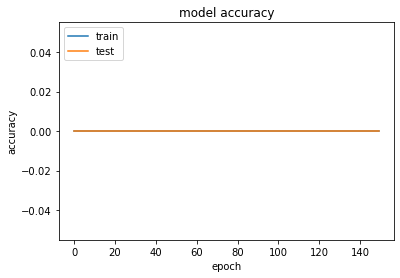

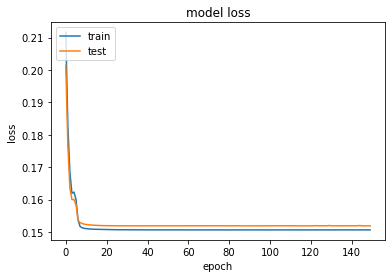

In [6]:
import matplotlib.pyplot as plt
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))
#model.add(Dense(1, activation='sigmoid'))
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, y, validation_split=0.33, epochs=150, batch_size=10, verbose=0)
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

(6700, 4) (3300, 4) (6700,) (3300,)
dict_keys(['loss', 'accuracy'])


KeyError: 'val_accuracy'

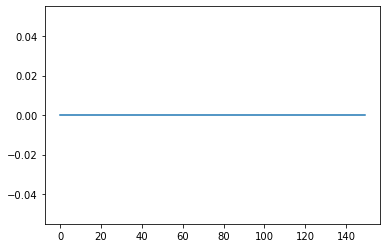

In [5]:
# mlp for regression from here: https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/ 
from numpy import sqrt
from numpy import loadtxt
import numpy as np
from pandas import read_csv
from sklearn.model_selection import train_test_split
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
# load the dataset
#path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
#path = 'https://github.com/FoleyLab/wptherml/blob/neural-net/example/pv.csv'
#df = read_csv(path, header=None)
dataset2 = loadtxt('pv_large.csv', delimiter=',')
X = dataset2[:,0:4]
y = dataset2[:,4]
# split into input and output columns
#X, y = df.values[:, :-1], df.values[:, -1]
# split into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
#model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(n_features,)))
#model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=13))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
### From python for microscopists example
#model = Sequential()
#model.add(Dense(128, input_dim=13, activation='relu'))
#model.add(Dense(64, activation='relu'))
#Output layer
#model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# evaluate the model
error = model.evaluate(X_test, y_test, verbose=0)
print('MSE: %.3f, RMSE: %.3f' % (error, sqrt(error)))


In [11]:
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

# load data and arrange into Pandas dataframe
df = read_csv("housing.csv", delim_whitespace=True, header=None)

feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 
                 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


df.columns = feature_names
print(df.head())

df = df.rename(columns={'MEDV': 'PRICE'})
print(df.describe())


#Split into features and target (Price)
X = df.drop('PRICE', axis = 1)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20)


#Scale data, otherwise model will fail.
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


# define the model
#Experiment with deeper and wider networks
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=13))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='linear'))
### From python for microscopists example
#model = Sequential()
#model.add(Dense(128, input_dim=13, activation='relu'))
#model.add(Dense(64, activation='relu'))
#Output layer
#model.add(Dense(1, activation='linear'))

model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
model.summary()

history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs =100)

print(history.history.keys())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

11/11 [==============================] - 0s 3ms/step - loss: 120.1346 - mae: 8.2299 - val_loss: 98.1825 - val_mae: 7.8257
Epoch 38/100
11/11 [==============================] - 0s 3ms/step - loss: 111.9629 - mae: 7.9332 - val_loss: 89.9296 - val_mae: 7.4455
Epoch 39/100
11/11 [==============================] - 0s 2ms/step - loss: 104.4719 - mae: 7.6775 - val_loss: 82.6795 - val_mae: 7.1088
Epoch 40/100
11/11 [==============================] - 0s 3ms/step - loss: 97.5300 - mae: 7.4374 - val_loss: 75.6182 - val_mae: 6.8132
Epoch 41/100
11/11 [==============================] - 0s 3ms/step - loss: 91.1582 - mae: 7.2042 - val_loss: 69.7675 - val_mae: 6.5612
Epoch 42/100
11/11 [==============================] - 0s 3ms/step - loss: 85.4662 - mae: 6.9795 - val_loss: 64.6868 - val_mae: 6.3314
Epoch 43/100
11/11 [==============================] - 0s 3ms/step - loss: 80.1839 - mae: 6.7648 - val_loss: 60.1322 - val_mae: 6.1172
Epoch 44/100
11/11 [==============================] - 0s 3ms/step - loss

11/11 [==============================] - 0s 3ms/step - loss: 23.0171 - mae: 3.4352 - val_loss: 17.4429 - val_mae: 3.4189
Epoch 99/100
11/11 [==============================] - 0s 3ms/step - loss: 22.7054 - mae: 3.4251 - val_loss: 17.3410 - val_mae: 3.4076
Epoch 100/100
11/11 [==============================] - 0s 3ms/step - loss: 22.5018 - mae: 3.4067 - val_loss: 17.0955 - val_mae: 3.3967
dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])


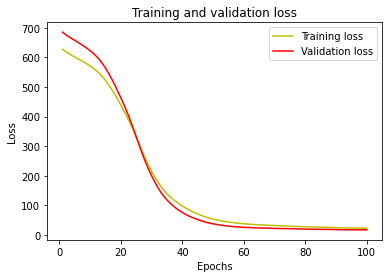

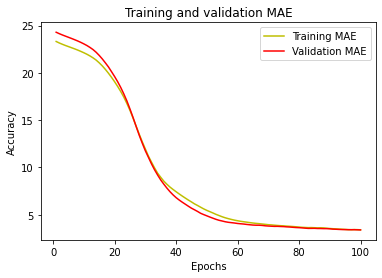

In [12]:
from matplotlib import pyplot as plt
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['mae']
val_acc = history.history['val_mae']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:

############################################
#Predict on test data
predictions = model.predict(X_test_scaled[:5])
print("Predicted values are: ", predictions)
print("Real values are: ", y_test[:5])
##############################################

#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test_scaled, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

######################################################################
#Linear regression
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

### Linear regression
lr_model = linear_model.LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
print('Mean squared error from linear regression: ', mse_lr)
print('Mean absolute error from linear regression: ', mae_lr)

############################################################
### Decision tree
tree = DecisionTreeRegressor()
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
mse_dt = mean_squared_error(y_test, y_pred_tree)
mae_dt = mean_absolute_error(y_test, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

##############################################
#Random forest.
#Increase number of tress and see the effect
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators = 30, random_state=30)
model.fit(X_train_scaled, y_train)

y_pred_RF = model.predict(X_test_scaled)

mse_RF = mean_squared_error(y_test, y_pred_RF)
mae_RF = mean_absolute_error(y_test, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)

#Feature ranking...
import pandas as pd
feature_list = list(X.columns)
feature_imp = pd.Series(model.feature_importances_, index=feature_list).sort_values(ascending=False)
print(feature_imp)

In [24]:
# make a prediction
#row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98]
row = [0.7229578742021455, 0.24338130984651926, 0.8155514775551478, 0.237018855782174]  
val = 0.0323205559416686
#row = [0.7832504072526616, 0.7972951809166082, 0.3100291728028289, 0.6035515257382925]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)
print('Actual: %.3f' % val)
print('Error: %.3f' % np.sqrt((val-yhat)**2))
row = [0.8305694447410932, 0.03832207713616056, 0.31393311121382494, 0.6361623319319516] 
val = 0.05061199077126367
#row = [0.7832504072526616, 0.7972951809166082, 0.3100291728028289, 0.6035515257382925]
yhat = model.predict([row])
print('Predicted: %.3f' % yhat)
print('Actual: %.3f' % val)
print('Error: %.3f' % np.sqrt((val-yhat)**2))

Predicted: 0.035
Actual: 0.032
Error: 0.002
Predicted: 0.052
Actual: 0.051
Error: 0.001
